# Let's try out the vMF sampling in TensorFlow

In [1]:
import numpy as np
np.random.seed(12345)

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

plt.rcParams.update({
    "text.usetex": True,
})

from tensorflow_probability.substrates import jax as tfp
tfd = tfp.distributions

import jax.random as jr
import jax.numpy as jnp

init_key = jr.key(123)

In [2]:
mu = jnp.array([1., 0, 1., 0, 0, 0, 0, 0, 0, 0])
mu /= jnp.linalg.norm(mu)
kappa = jnp.array(100.)
vmf = tfd.VonMisesFisher(mu, kappa)

In [3]:
key, sample_key = jr.split(init_key)
vmf.sample((5,), init_key)

Array([[ 0.6974215 ,  0.05474938,  0.67261314,  0.00782426, -0.00766407,
        -0.17668462, -0.03406396,  0.13866949, -0.06038214,  0.05314424],
       [ 0.66943806,  0.01271304,  0.67316324, -0.11833112,  0.00962229,
         0.20521495, -0.03169429,  0.19623032,  0.02463288, -0.04708289],
       [ 0.666365  ,  0.03146571,  0.721792  ,  0.06049603,  0.05925521,
         0.02217514,  0.09734441, -0.08540754,  0.0247439 , -0.09454396],
       [ 0.6026939 ,  0.0149299 ,  0.7054784 ,  0.19846982,  0.16115092,
         0.17767456,  0.0573648 , -0.18525147,  0.06519538,  0.00706639],
       [ 0.7698822 , -0.01116043,  0.50735784, -0.0074775 ,  0.2572764 ,
        -0.21810326,  0.16260846,  0.03149116, -0.01026568, -0.09159826]],      dtype=float32)

Now, let's take a bunch of samples and see how they are distributed:

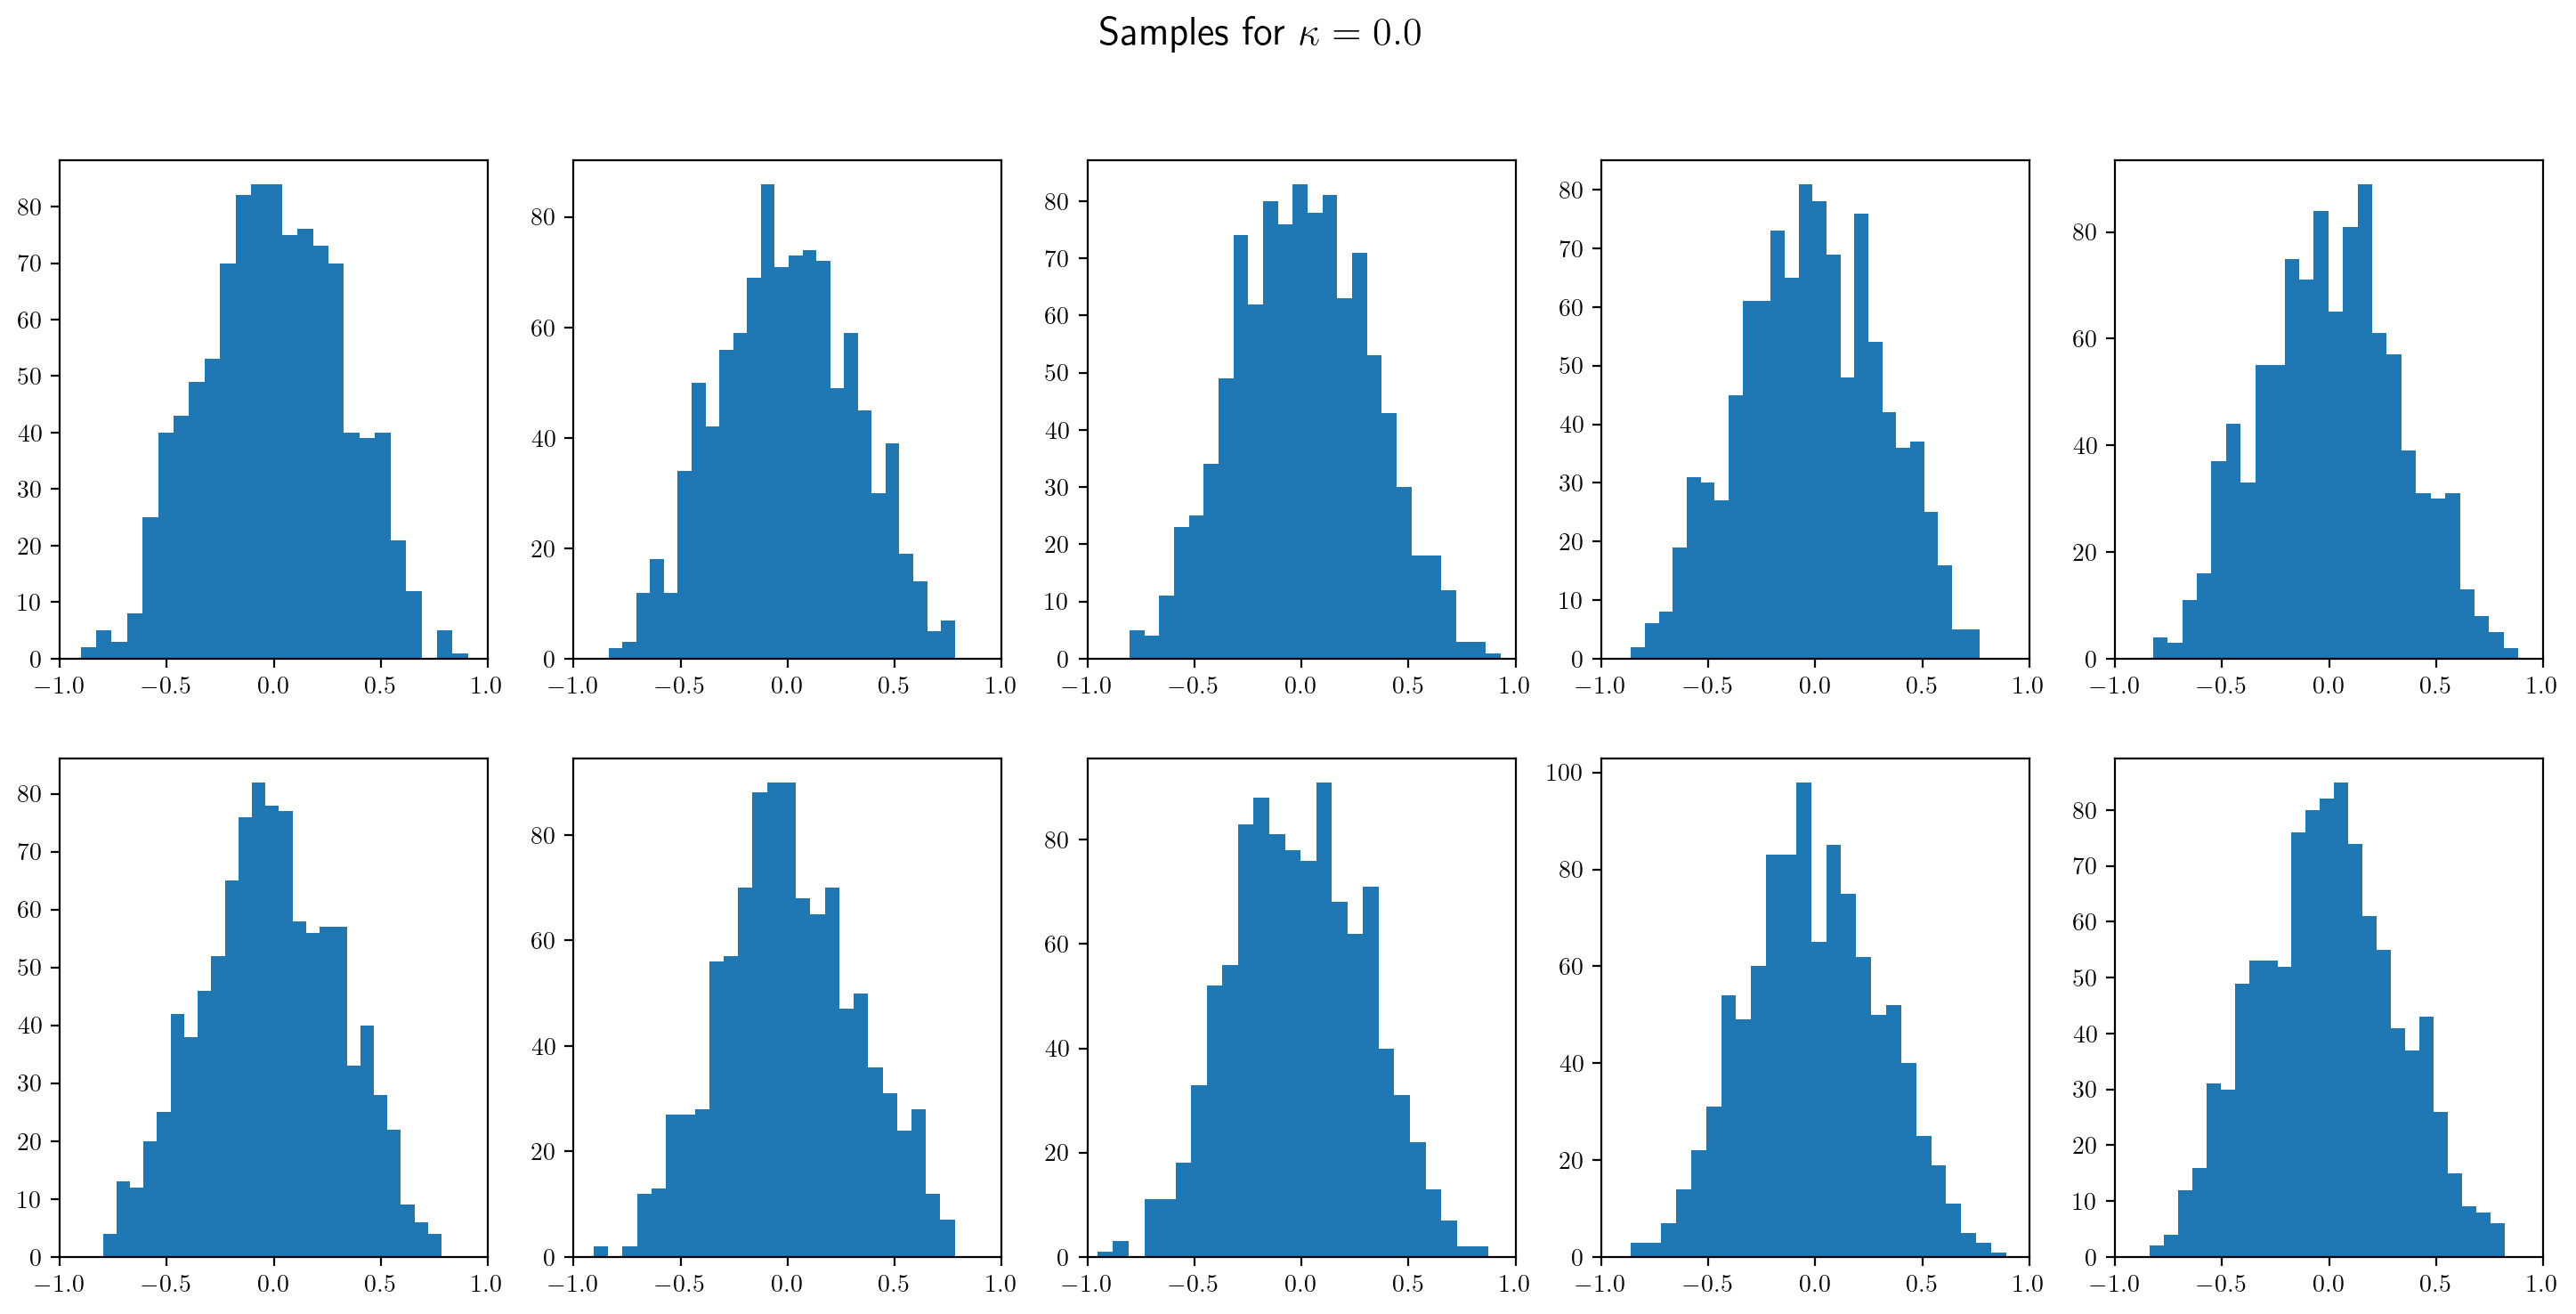

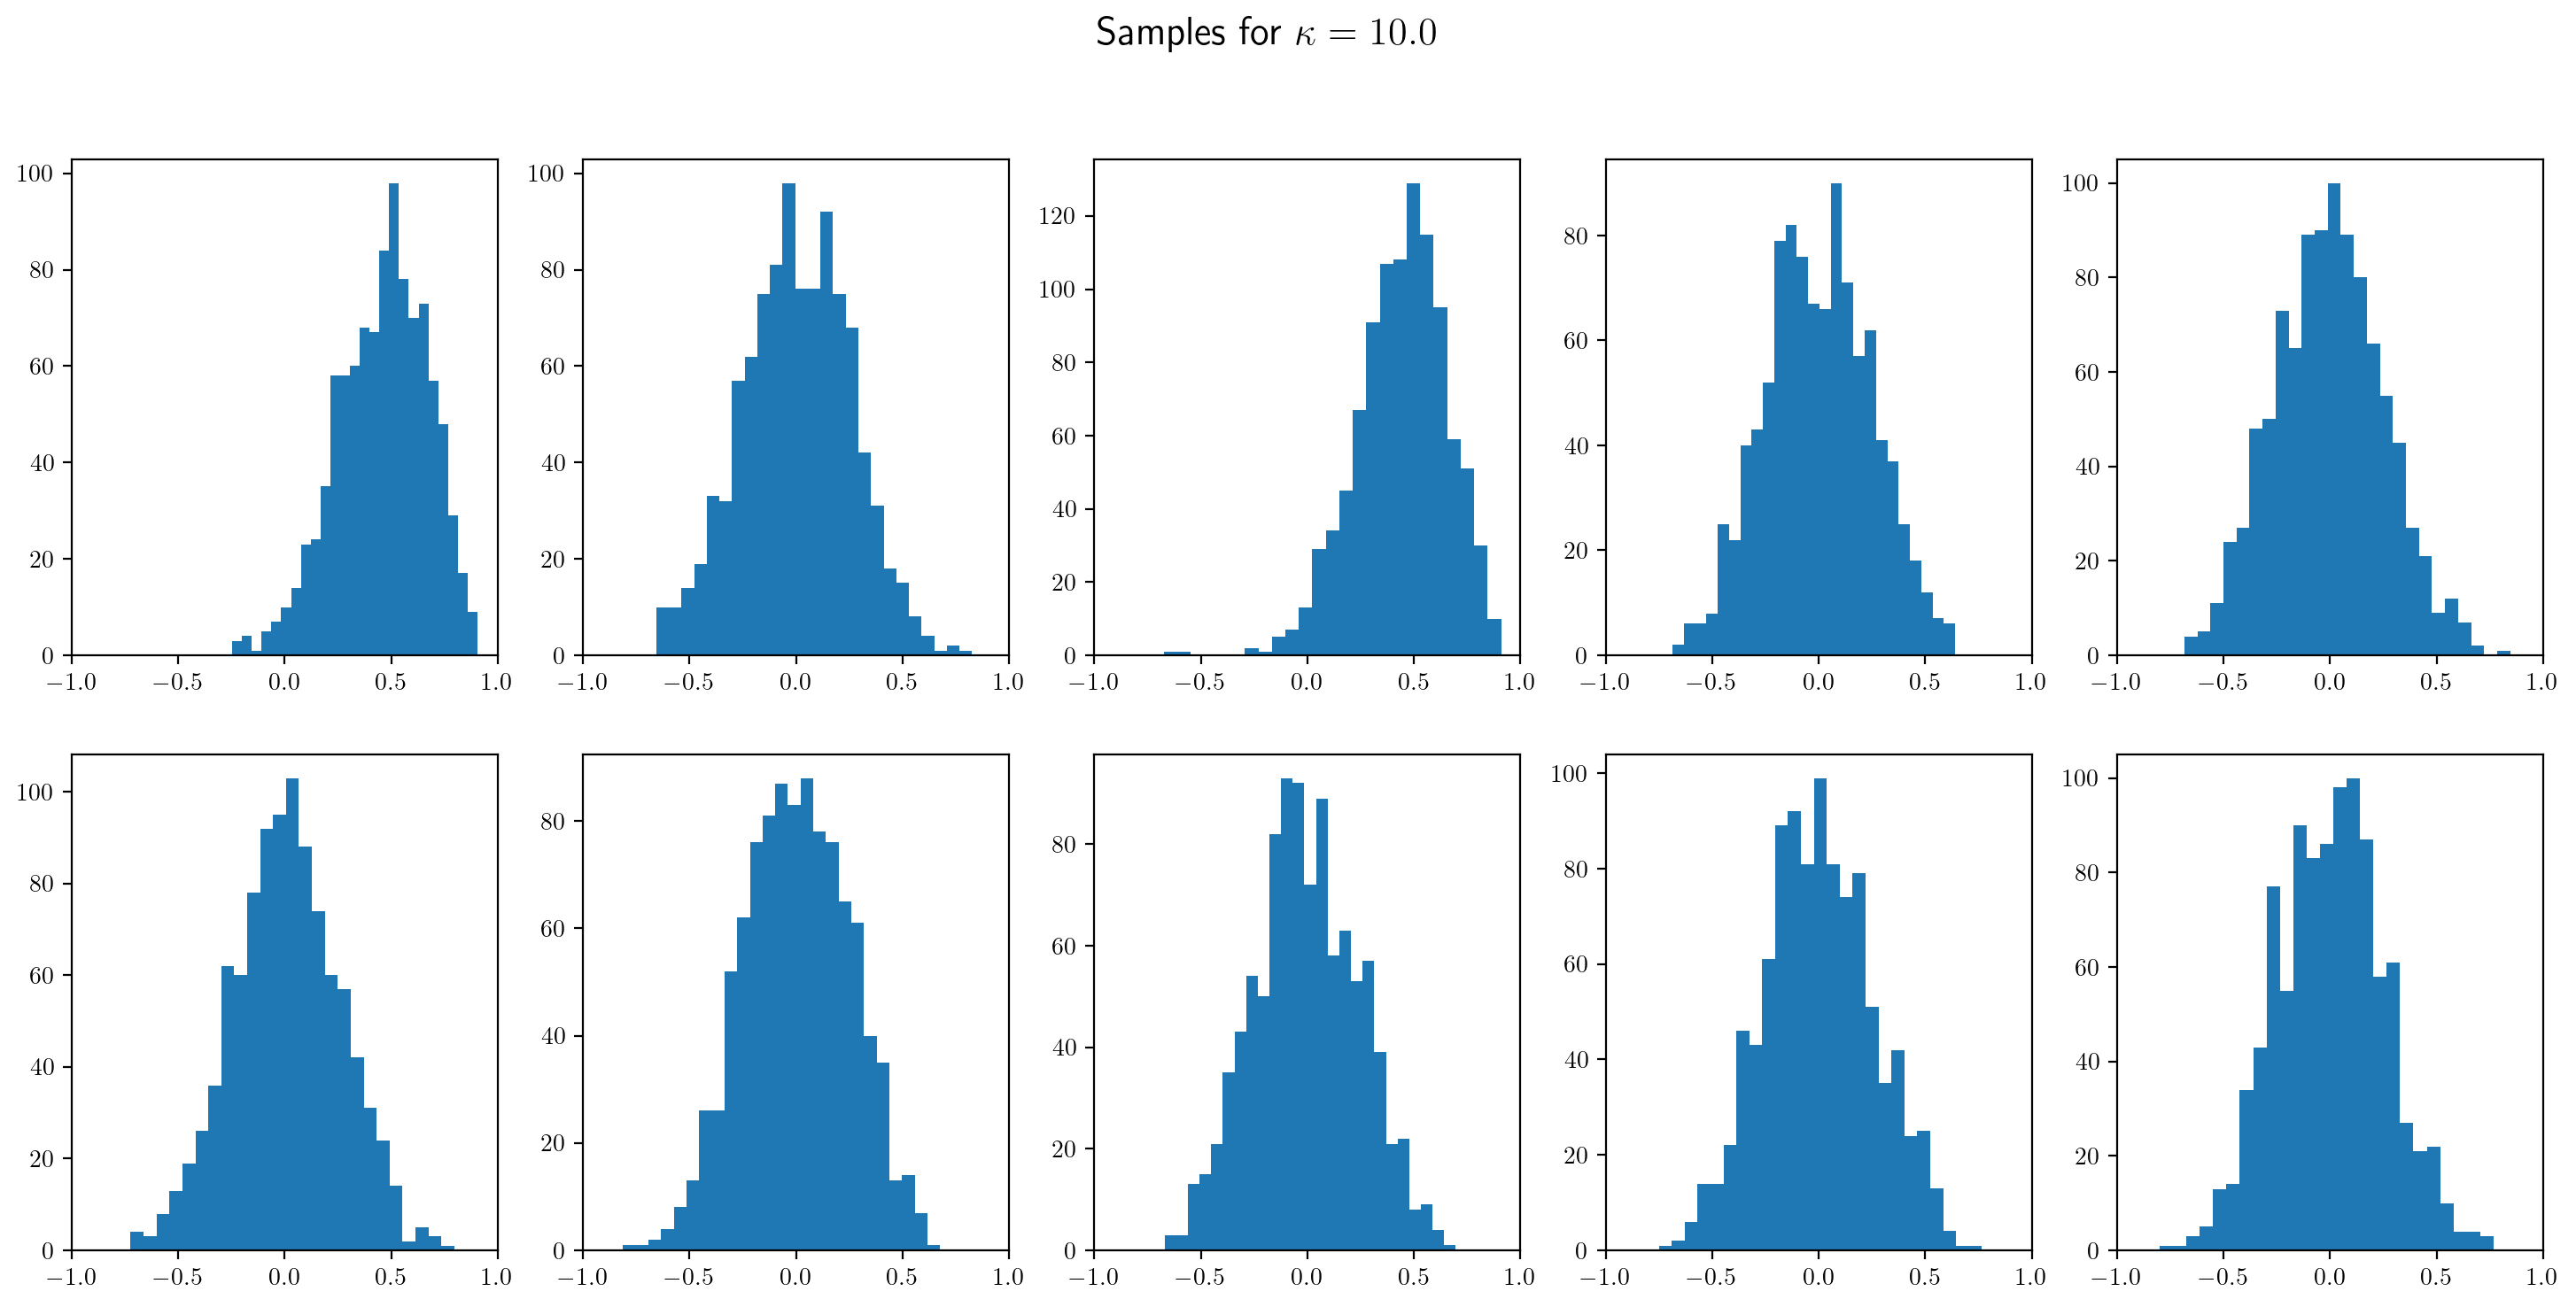

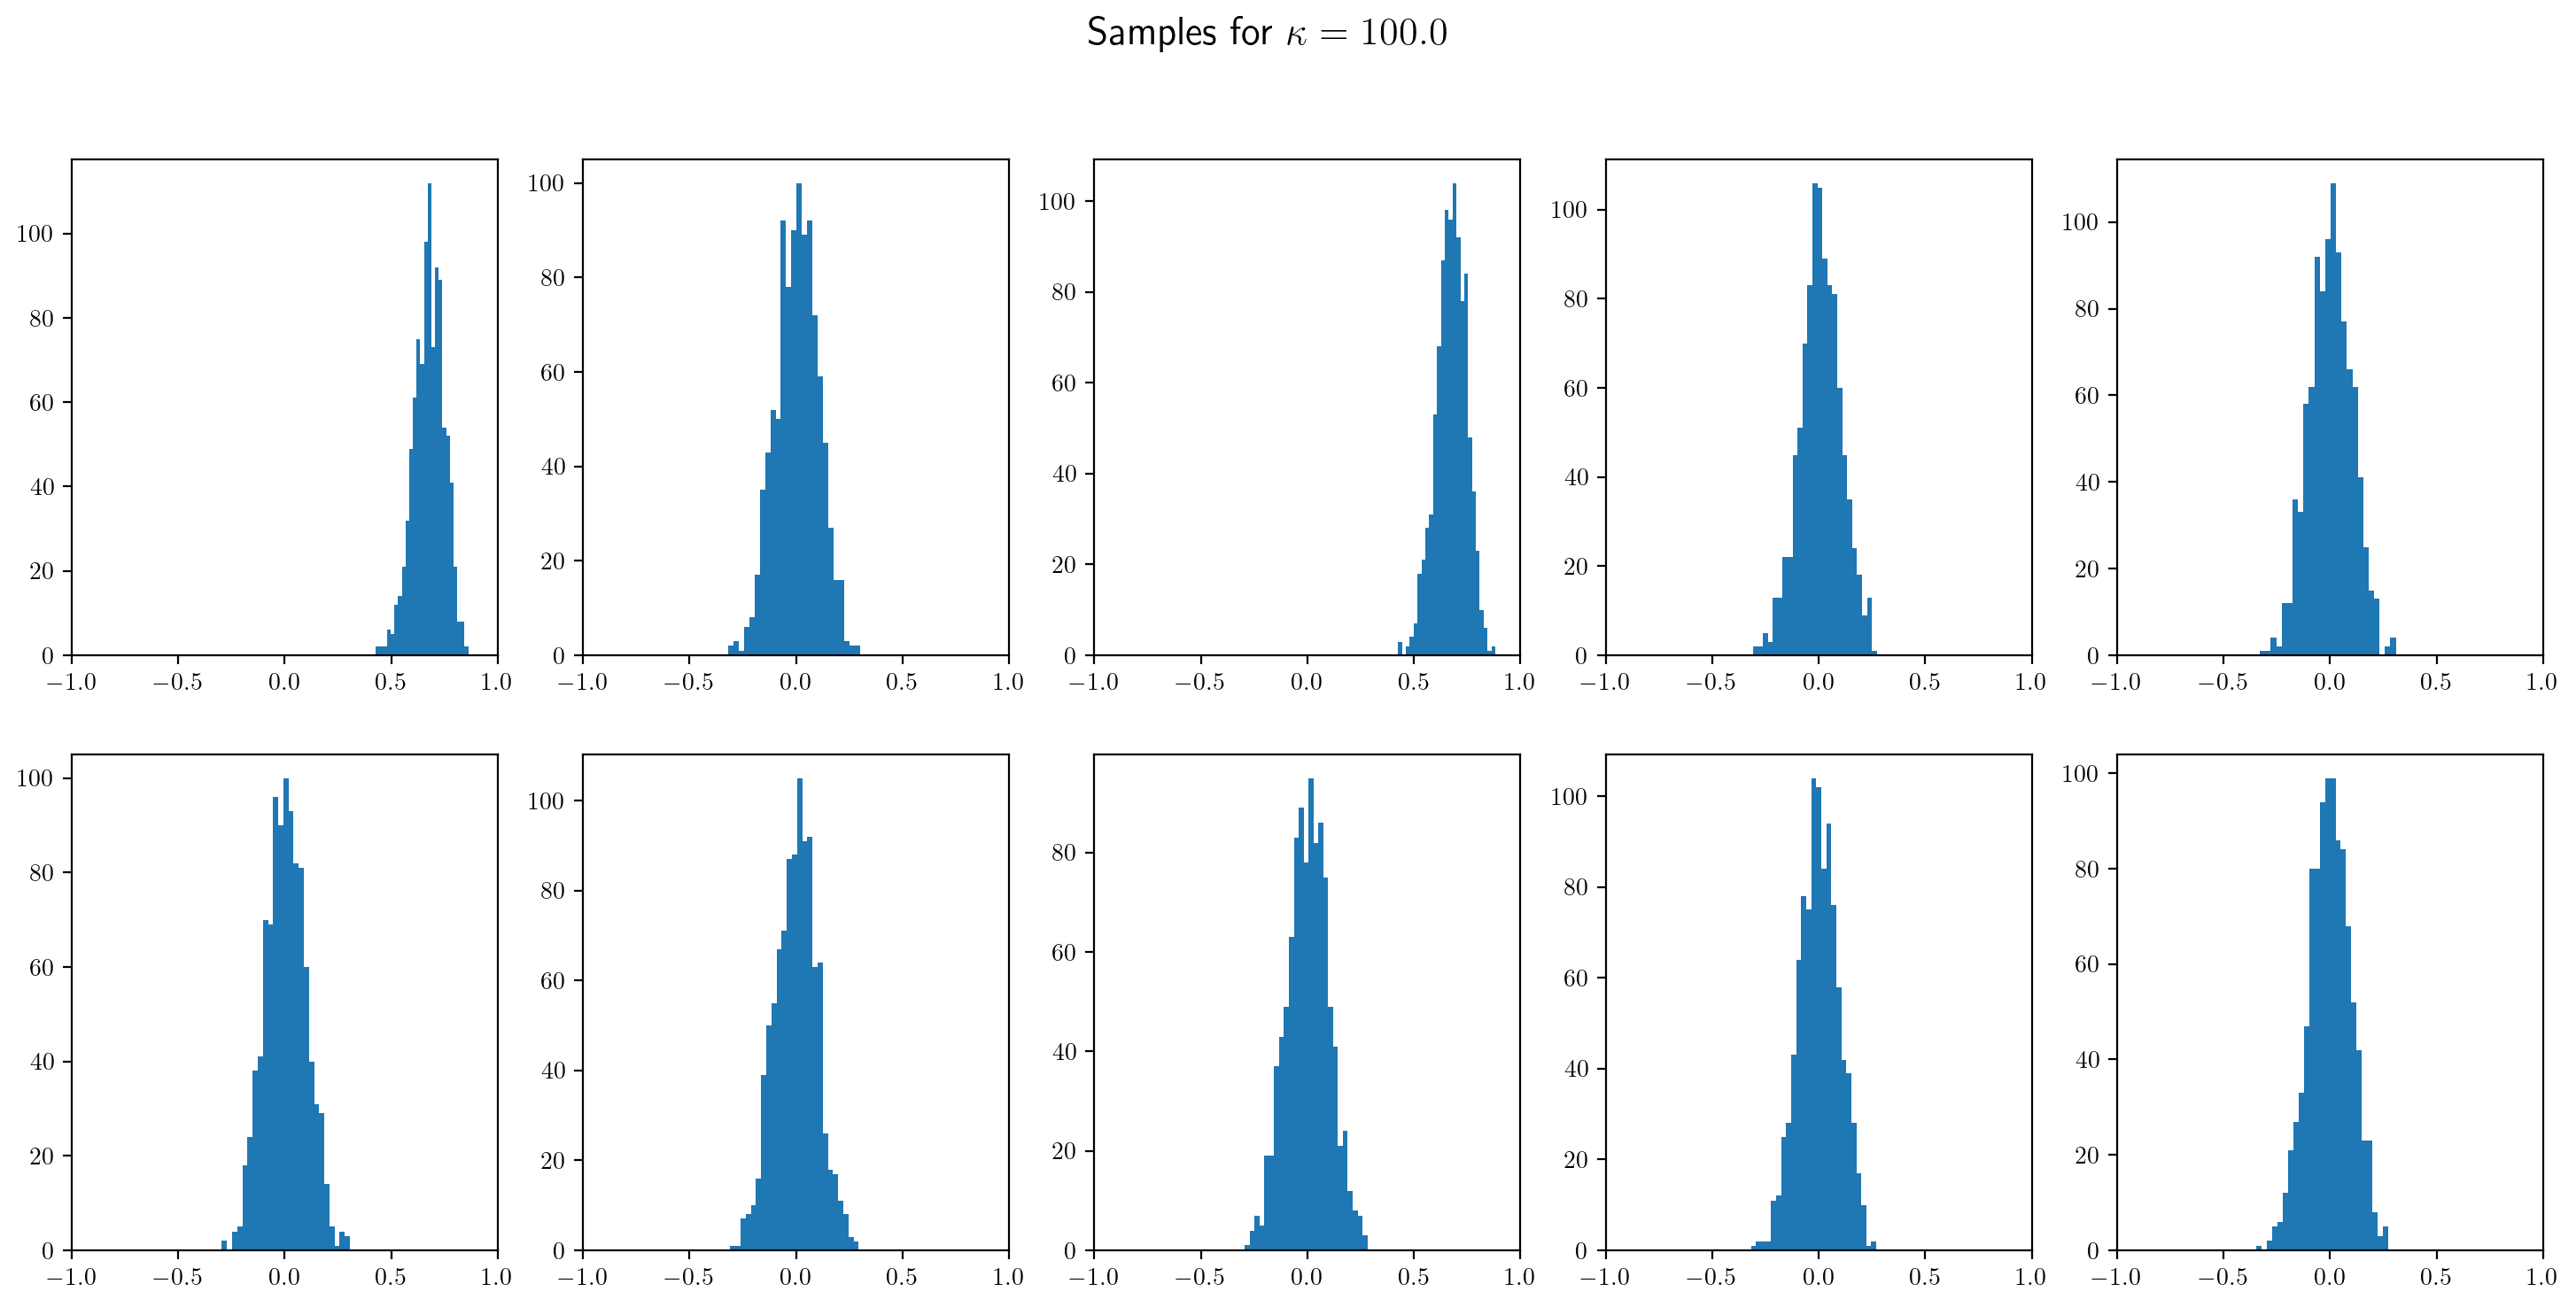

In [4]:
kappa_list = [0., 10., 100.]

for kappa in kappa_list:
    vmf = tfd.VonMisesFisher(mu, kappa)

    key, sample_key = jr.split(key)
    samples = vmf.sample((1_000,), sample_key)

    fig, ax = plt.subplots(2, 5, figsize=(18, 8))
    for idx, a in enumerate(ax.reshape(-1)):
        a.hist(samples[:, idx], bins=25);
        a.set_xlim(-1, 1)
    fig.suptitle(f"Samples for $\\kappa={vmf.concentration}$", fontsize=16);

# Higher dimensions

Now we can try a higher-dimensional example to see if everything still works as intended.

Text(0, 0.5, 'Coordinate value')

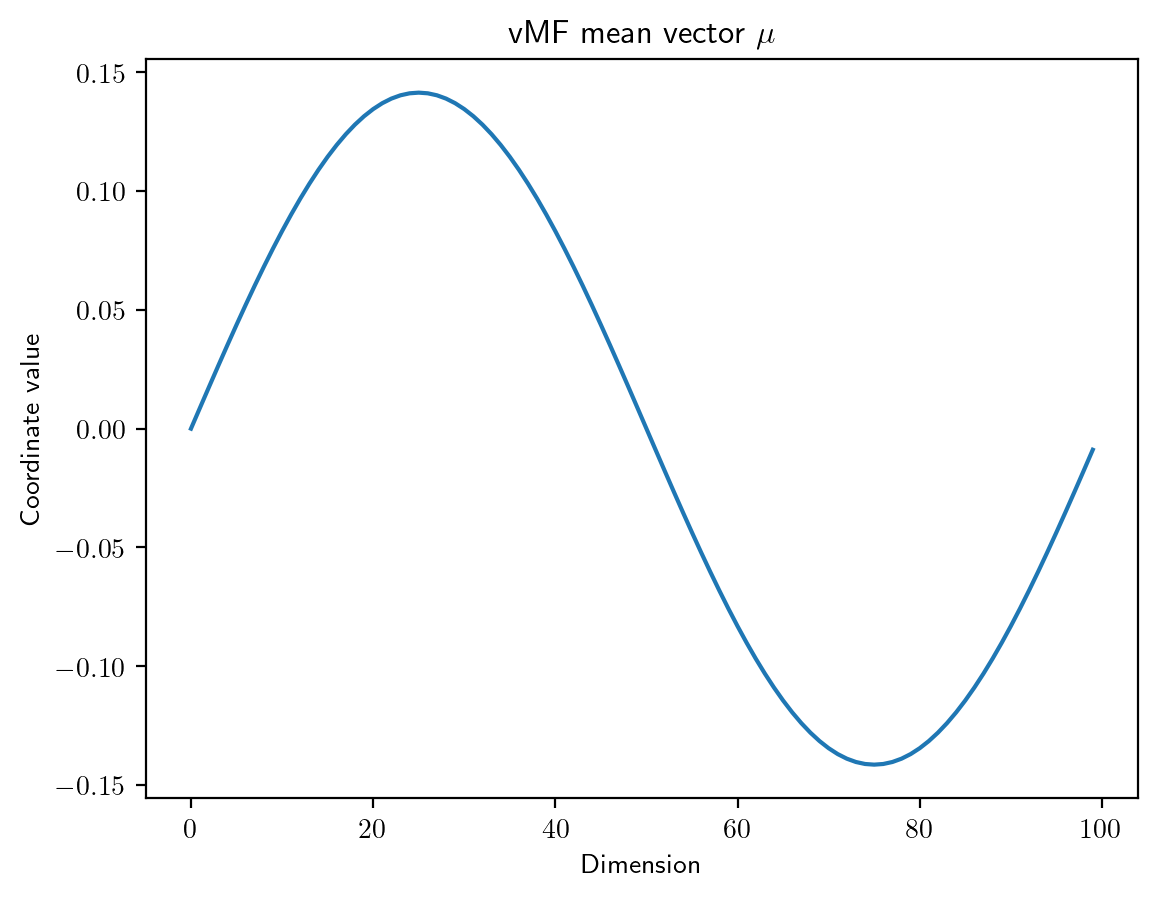

In [5]:
mu = jnp.sin(jnp.arange(100) * 2 * jnp.pi/100)
mu /= jnp.linalg.norm(mu)
plt.plot(mu);
plt.title("vMF mean vector $\\mu$")
plt.xlabel("Dimension")
plt.ylabel("Coordinate value")

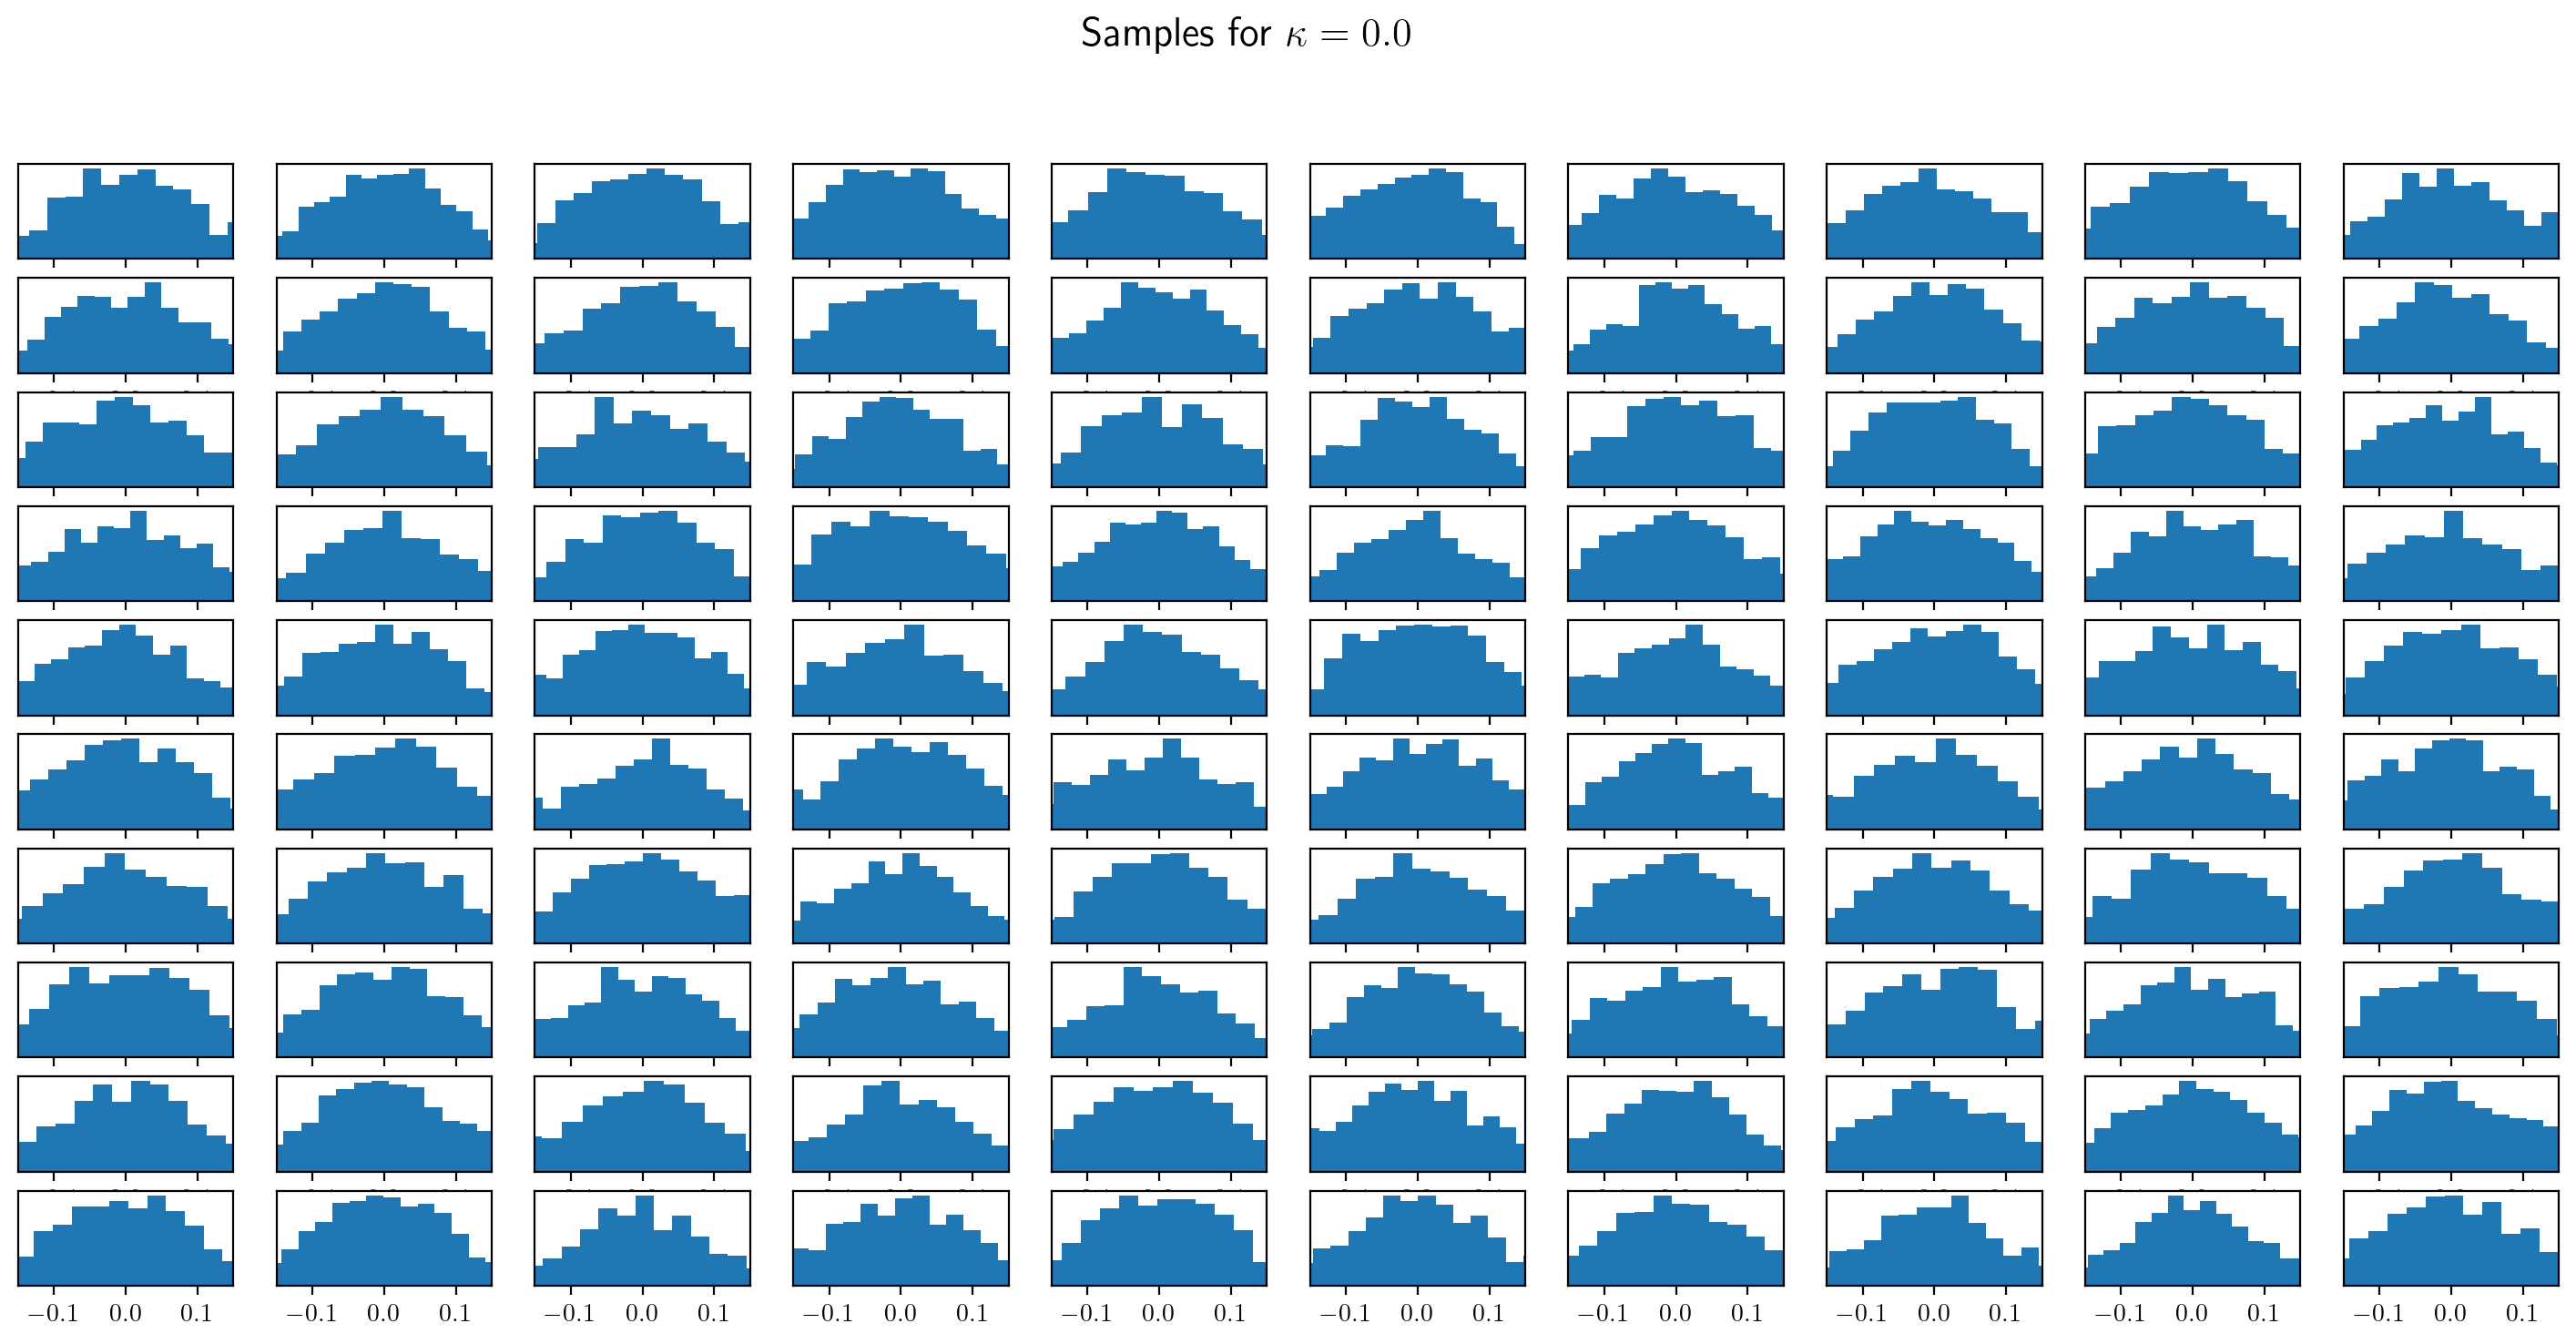

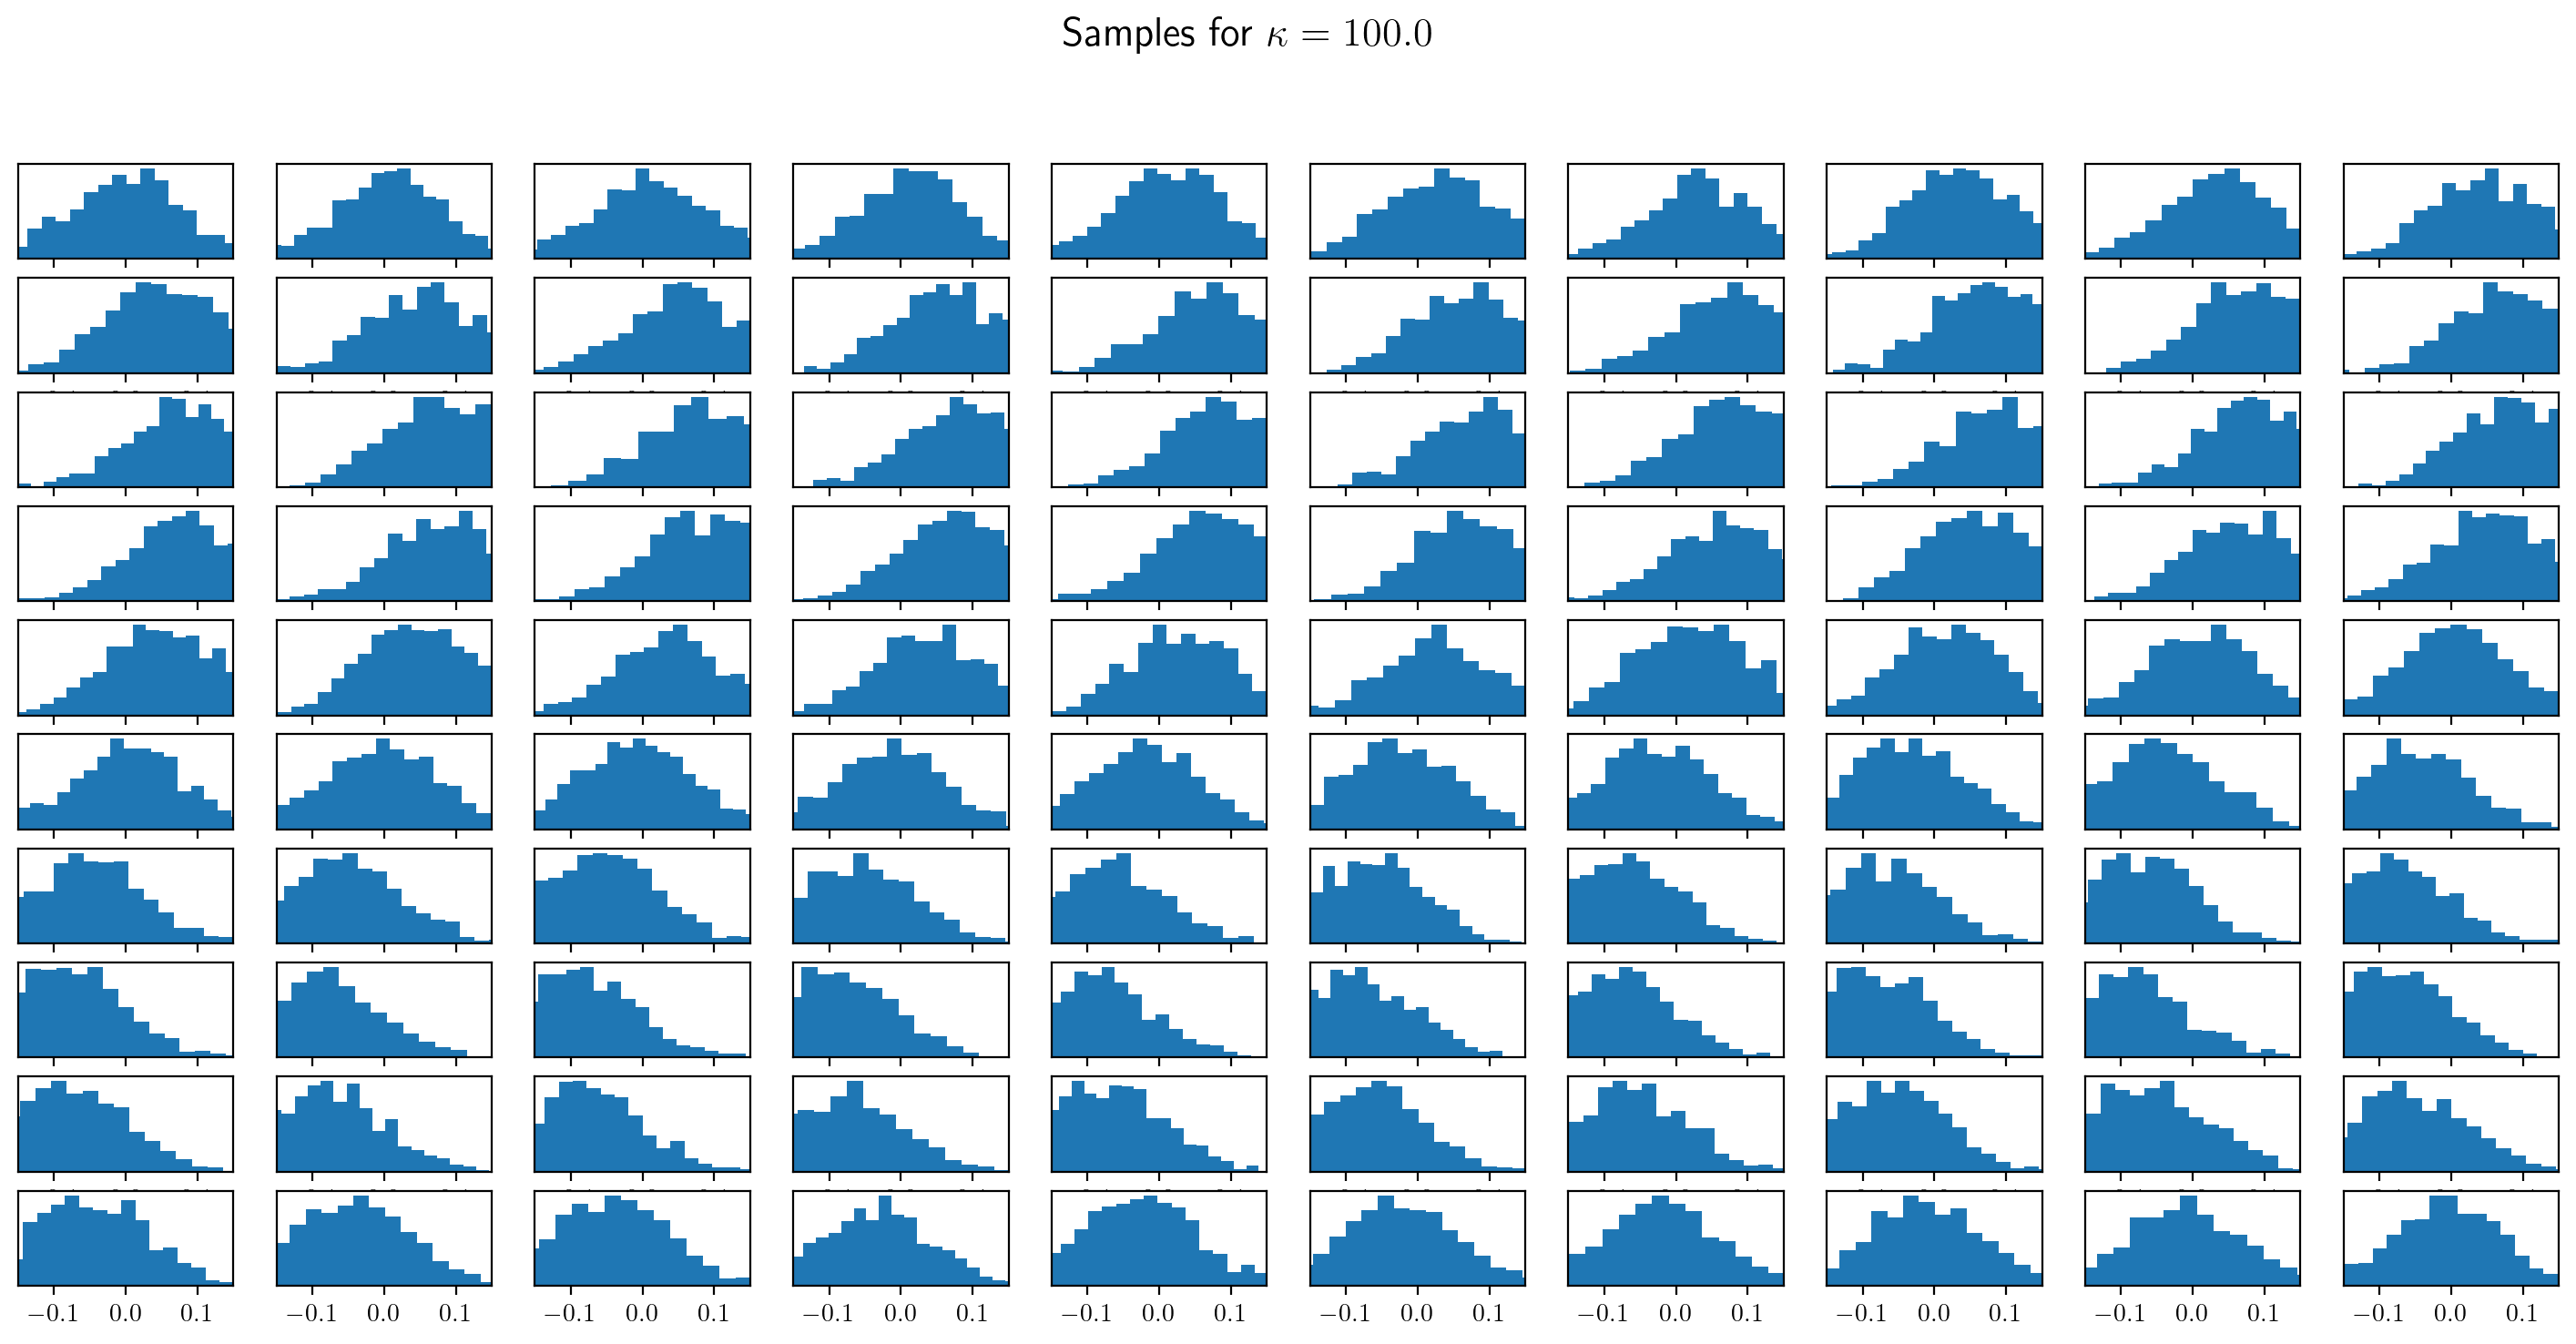

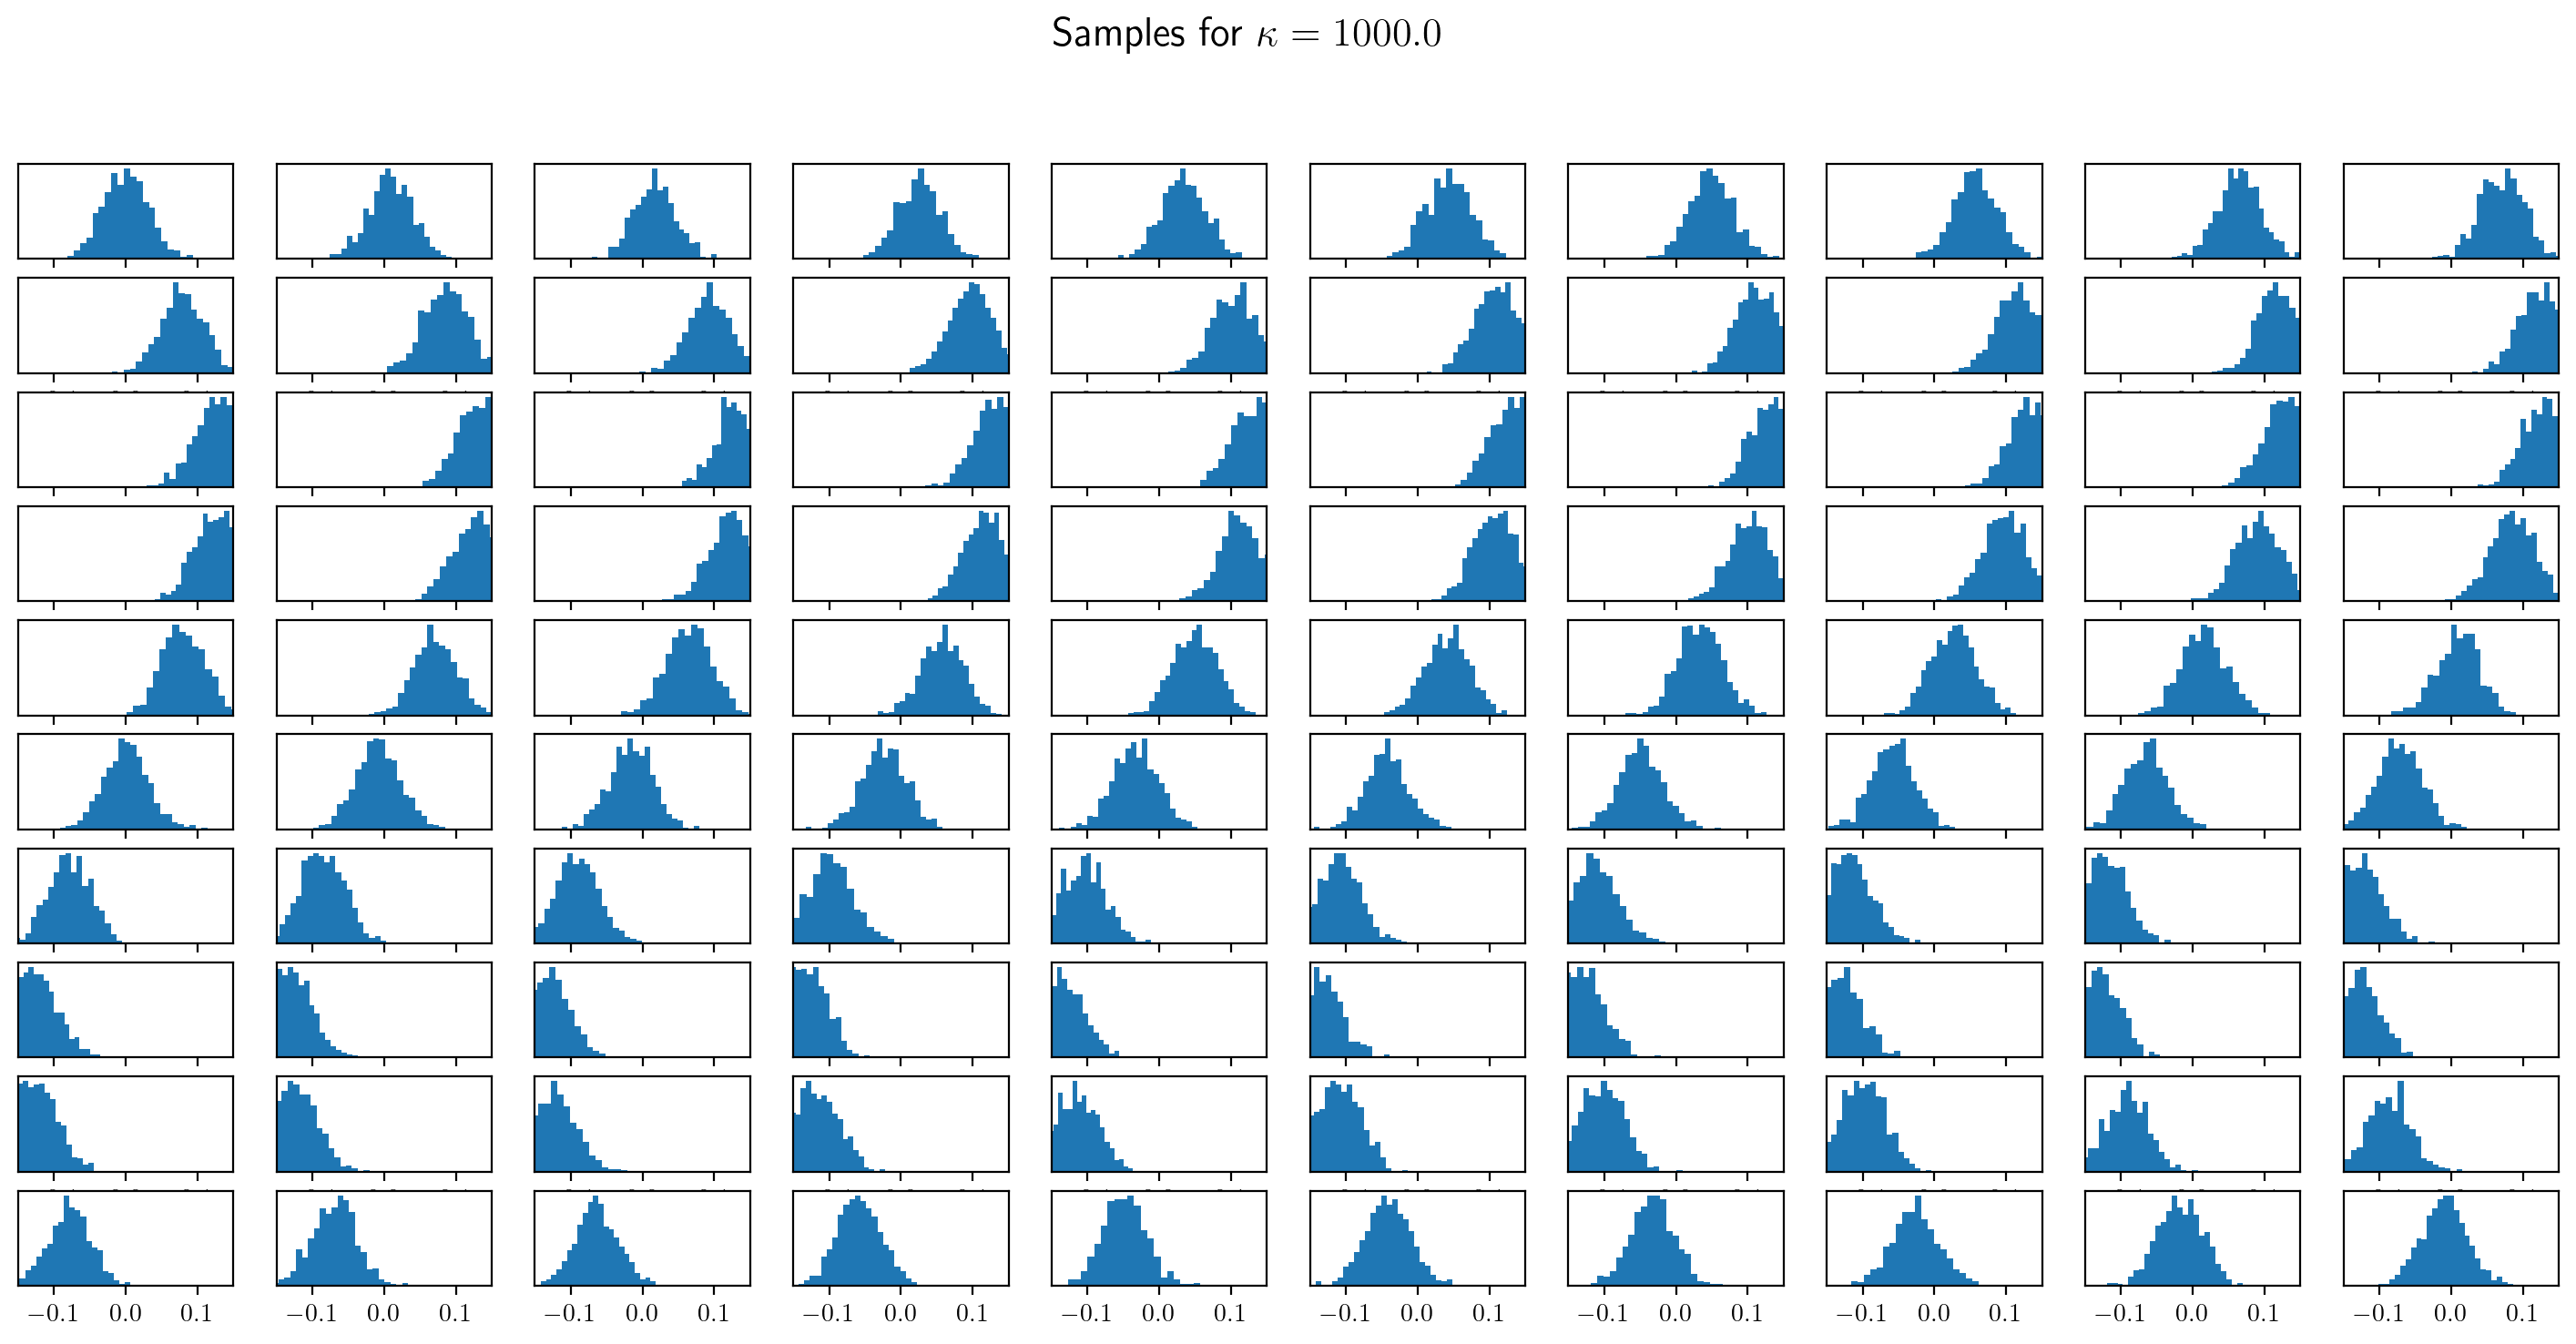

In [6]:
kappa_list = [0., 100., 1000.]

for kappa in kappa_list:
    vmf = tfd.VonMisesFisher(mu, kappa)

    key, sample_key = jr.split(key)
    samples = vmf.sample((1_000,), sample_key)

    fig, ax = plt.subplots(10, 10, figsize=(18, 8))
    for idx, a in enumerate(ax.reshape(-1)):
        a.hist(samples[:, idx], bins=25);
        a.set_xlim(-0.15, 0.15)
        a.set_yticks([])
    fig.suptitle(f"Samples for $\\kappa={vmf.concentration}$", fontsize=16);